First 5 rows of dataset:
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes
None

Missing Values:
Hours     0
Scores    0
dtype: int64


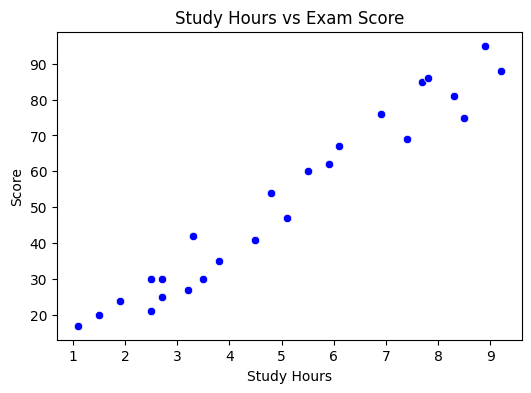

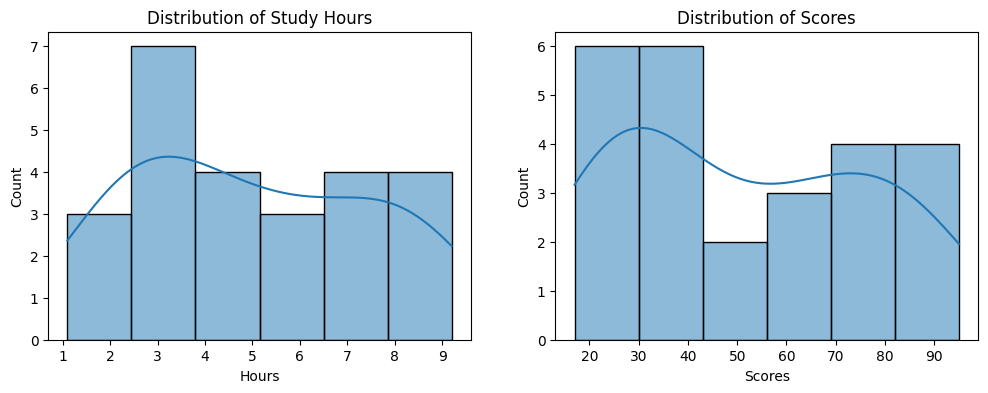

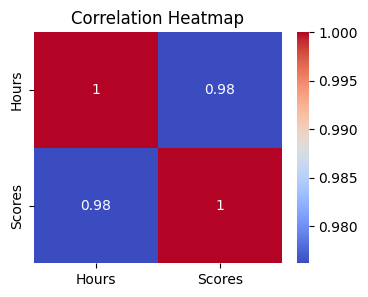


Linear Regression Coefficient (Slope): 9.682078154455697
Linear Regression Intercept: 2.826892353899737

Model Performance:
MAE: 3.9207511902099244
RMSE: 4.352380006653288
R² Score: 0.9678055545167994


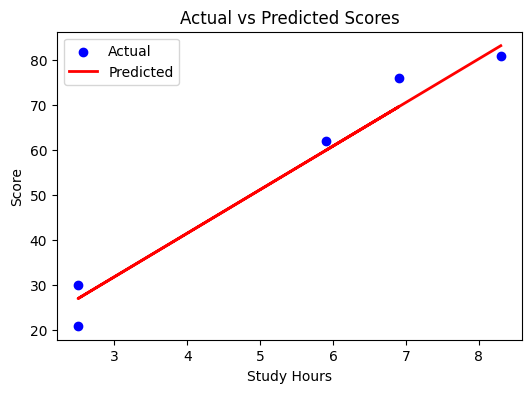


Polynomial Regression Results:
RMSE: 4.58985507814145
R² Score: 0.9641965165901754


C:\Users\shahe\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


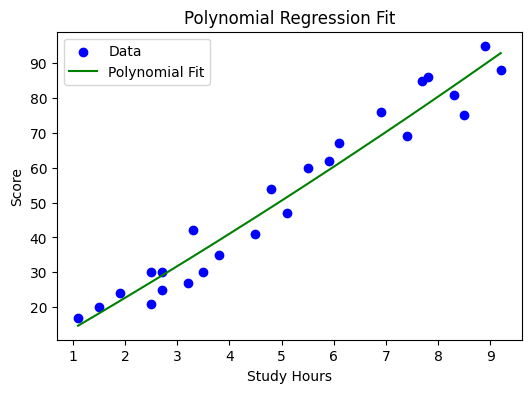

In [16]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# STEP 2: Load Dataset (Replace with actual dataset path)
url = r"C:\Users\shahe\OneDrive\Desktop\Internship\student_scores.csv"
df = pd.read_csv(url)

# STEP 3: Initial Data Check
print("First 5 rows of dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

# STEP 4: Exploratory Data Analysis (EDA)
plt.figure(figsize=(6,4))
sns.scatterplot(x='Hours', y='Scores', data=df, color='blue')
plt.title('Study Hours vs Exam Score')
plt.xlabel('Study Hours')
plt.ylabel('Score')
plt.show()

# Distribution Plots
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df['Hours'], kde=True)
plt.title("Distribution of Study Hours")

plt.subplot(1,2,2)
sns.histplot(df['Scores'], kde=True)
plt.title("Distribution of Scores")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(4,3))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# STEP 5: Split Data
X = df[['Hours']]  # independent variable
y = df['Scores']   # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 6: Train Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

print("\nLinear Regression Coefficient (Slope):", lr.coef_[0])
print("Linear Regression Intercept:", lr.intercept_)

# STEP 7: Prediction & Evaluation
y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)

# Visualization: Actual vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title("Actual vs Predicted Scores")
plt.xlabel("Study Hours")
plt.ylabel("Score")
plt.legend()
plt.show()

# STEP 8: Bonus - Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train_poly)
y_pred_poly = lr_poly.predict(X_test_poly)

# Evaluation
rmse_poly = np.sqrt(mean_squared_error(y_test_poly, y_pred_poly))
r2_poly = r2_score(y_test_poly, y_pred_poly)

print("\nPolynomial Regression Results:")
print("RMSE:", rmse_poly)
print("R² Score:", r2_poly)

# Visualization of Polynomial Fit
X_sorted = np.sort(X.values, axis=0)
X_sorted_poly = poly.transform(X_sorted)
plt.figure(figsize=(6,4))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_sorted, lr_poly.predict(X_sorted_poly), color='green', label='Polynomial Fit')
plt.title("Polynomial Regression Fit")
plt.xlabel("Study Hours")
plt.ylabel("Score")
plt.legend()
plt.show()
